In [330]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv("강건희_수집.csv")

In [134]:
data=data.iloc[:,1:]

In [135]:
df=data.copy()

In [136]:
dfw=data.copy()

In [156]:
word=input('찾고싶은 단어를 입력하세요: ')
c_list=[]
cw_list=[]
for i in range(len(df)):
    text = df.iloc[i,3].split()
    c2_list=[]
    for j in range(len(text)):
        if re.findall(r'.*'+word+'.*',text[j]) != []:
            c2_list.append(re.findall(r'.*'+word+'.*',text[j]))
    c_list.append(len(c2_list))
    cw_list.append(c2_list)
df[word+'_빈도_수']=c_list
dfw[word+'_포함_내용']=cw_list

찾고싶은 단어를 입력하세요:  재생


In [191]:
# df.to_csv('강건희_가공처리.csv')
# dfw.to_csv('강건희_가공처리_내용.csv')

In [336]:
plt.rcParams['font.family'] = 'Gulim'

In [319]:
#나온날 카운트
전기=[k for k in range(len(df)) if df.전기_빈도_수[k] > 0]
에너지=[k for k in range(len(df)) if df.에너지_빈도_수[k] > 0]
원자력=[k for k in range(len(df)) if df.원자력_빈도_수[k] > 0]
수력=[k for k in range(len(df)) if df.수력_빈도_수[k] > 0]
화력=[k for k in range(len(df)) if df.화력_빈도_수[k] > 0]
재생=[k for k in range(len(df)) if df.재생_빈도_수[k] > 0]

In [541]:
for x in ['전기_빈도_수','에너지_빈도_수','원자력_빈도_수',\
             '수력_빈도_수','화력_빈도_수','재생_빈도_수']:
    평균 = round(df.loc[:,x].mean(),2)
    표준편차 = round(df.loc[:,x].std(),2)
    최빈수 = round(df.loc[:,x].max(),2)
    print(x[:3],'평균',평균)
    print(x[:3],'표준편차',표준편차)
    print(x[:3],'최빈수',최빈수)
    print()

전기_ 평균 0.92
전기_ 표준편차 2.81
전기_ 최빈수 37

에너지 평균 2.08
에너지 표준편차 4.38
에너지 최빈수 38

원자력 평균 0.23
원자력 표준편차 1.24
원자력 최빈수 19

수력_ 평균 0.04
수력_ 표준편차 0.23
수력_ 최빈수 4

화력_ 평균 0.02
화력_ 표준편차 0.21
화력_ 최빈수 4

재생_ 평균 0.51
재생_ 표준편차 1.79
재생_ 최빈수 24



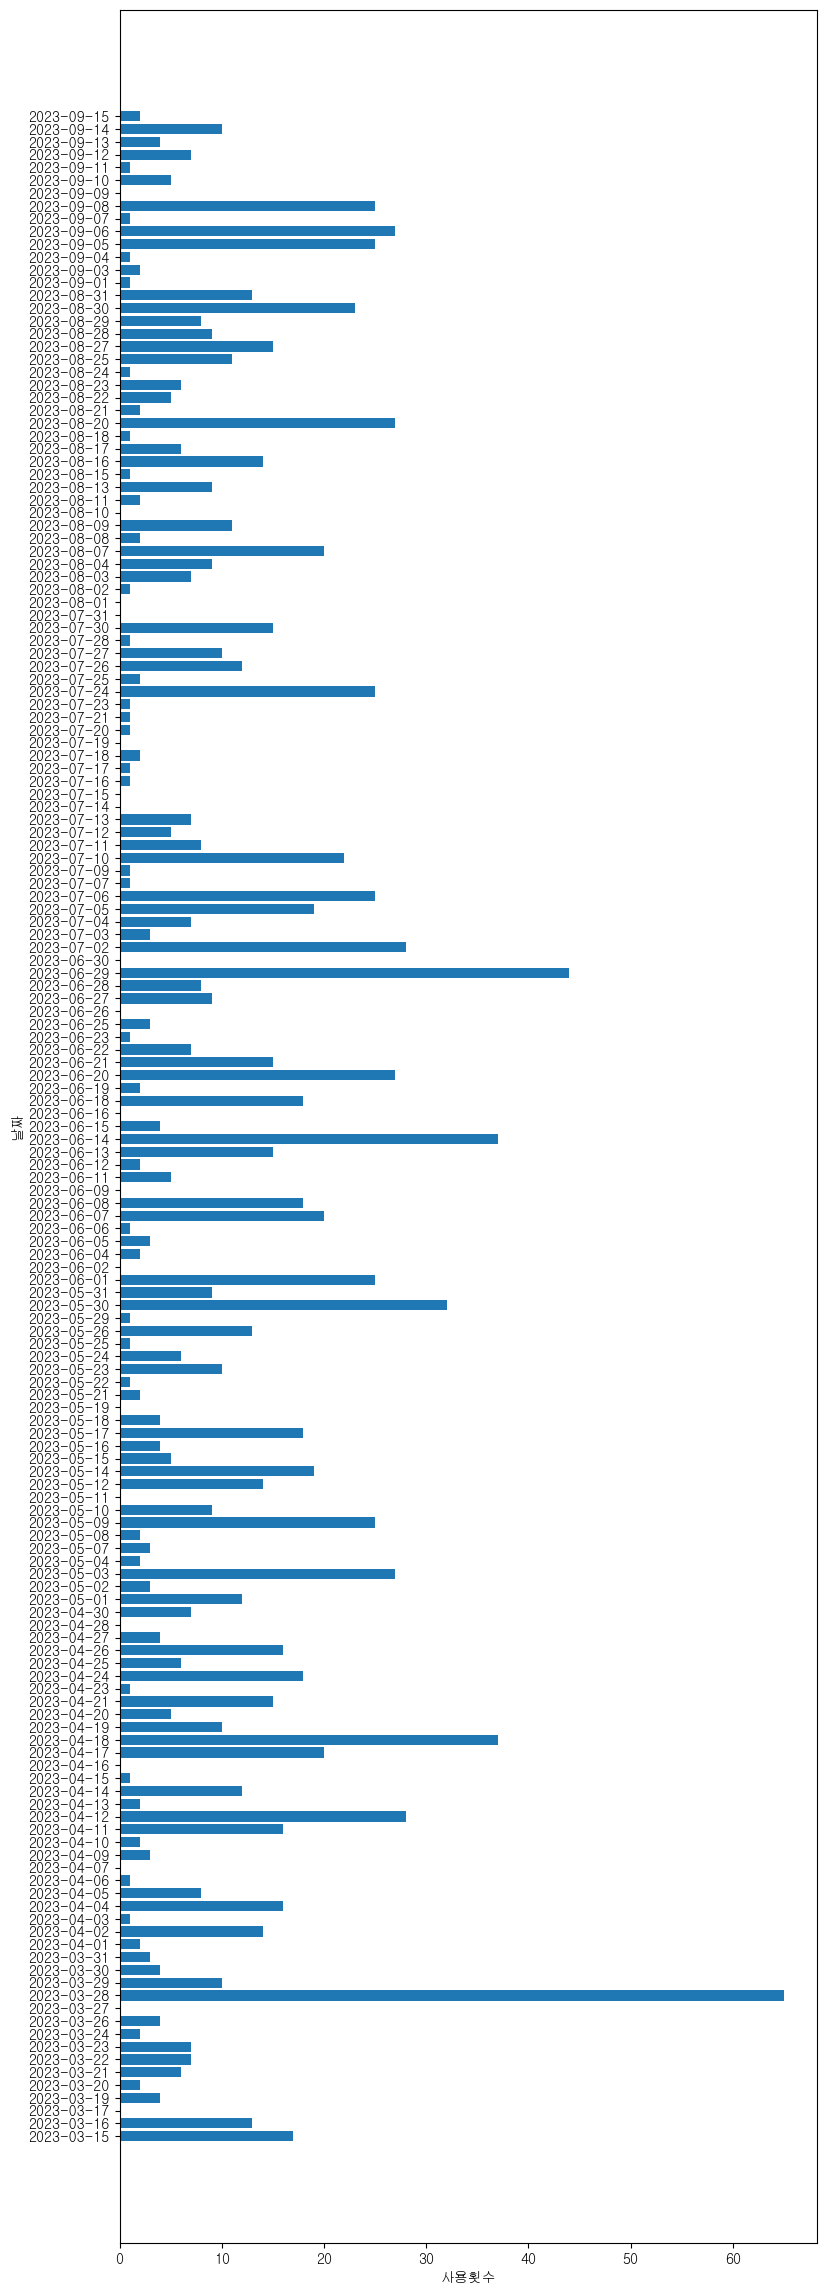

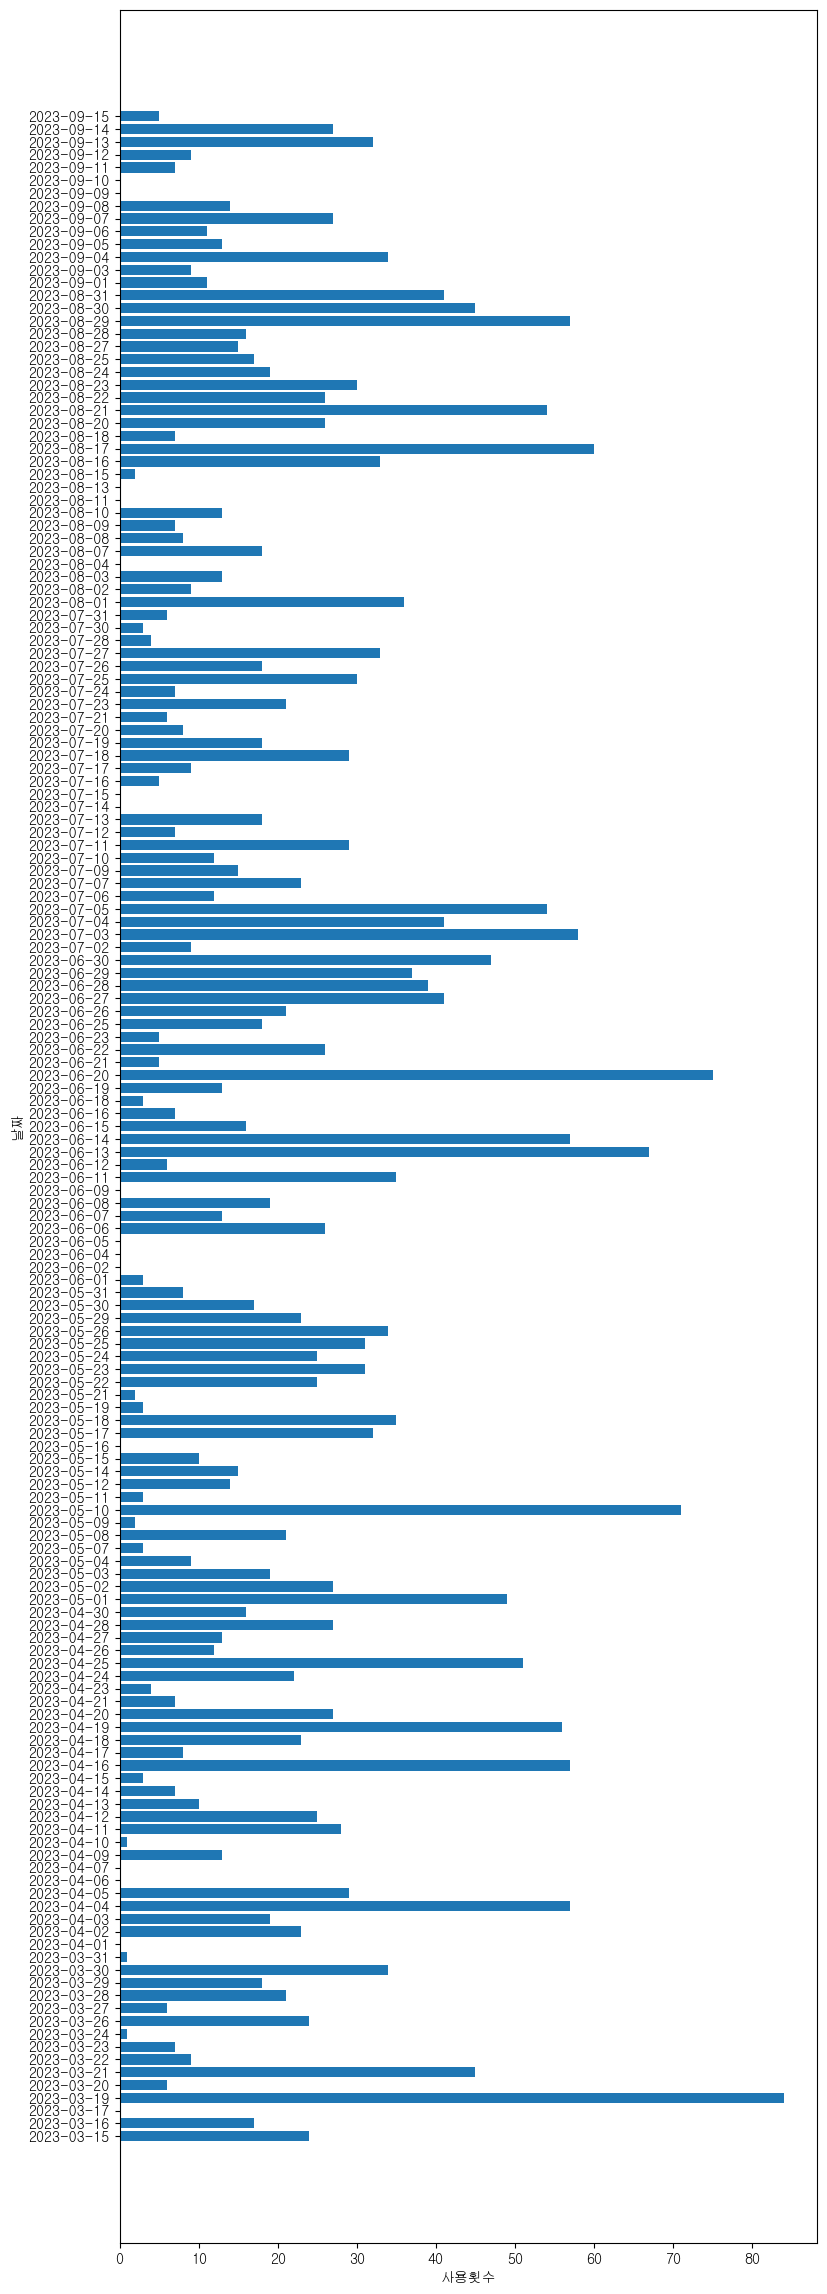

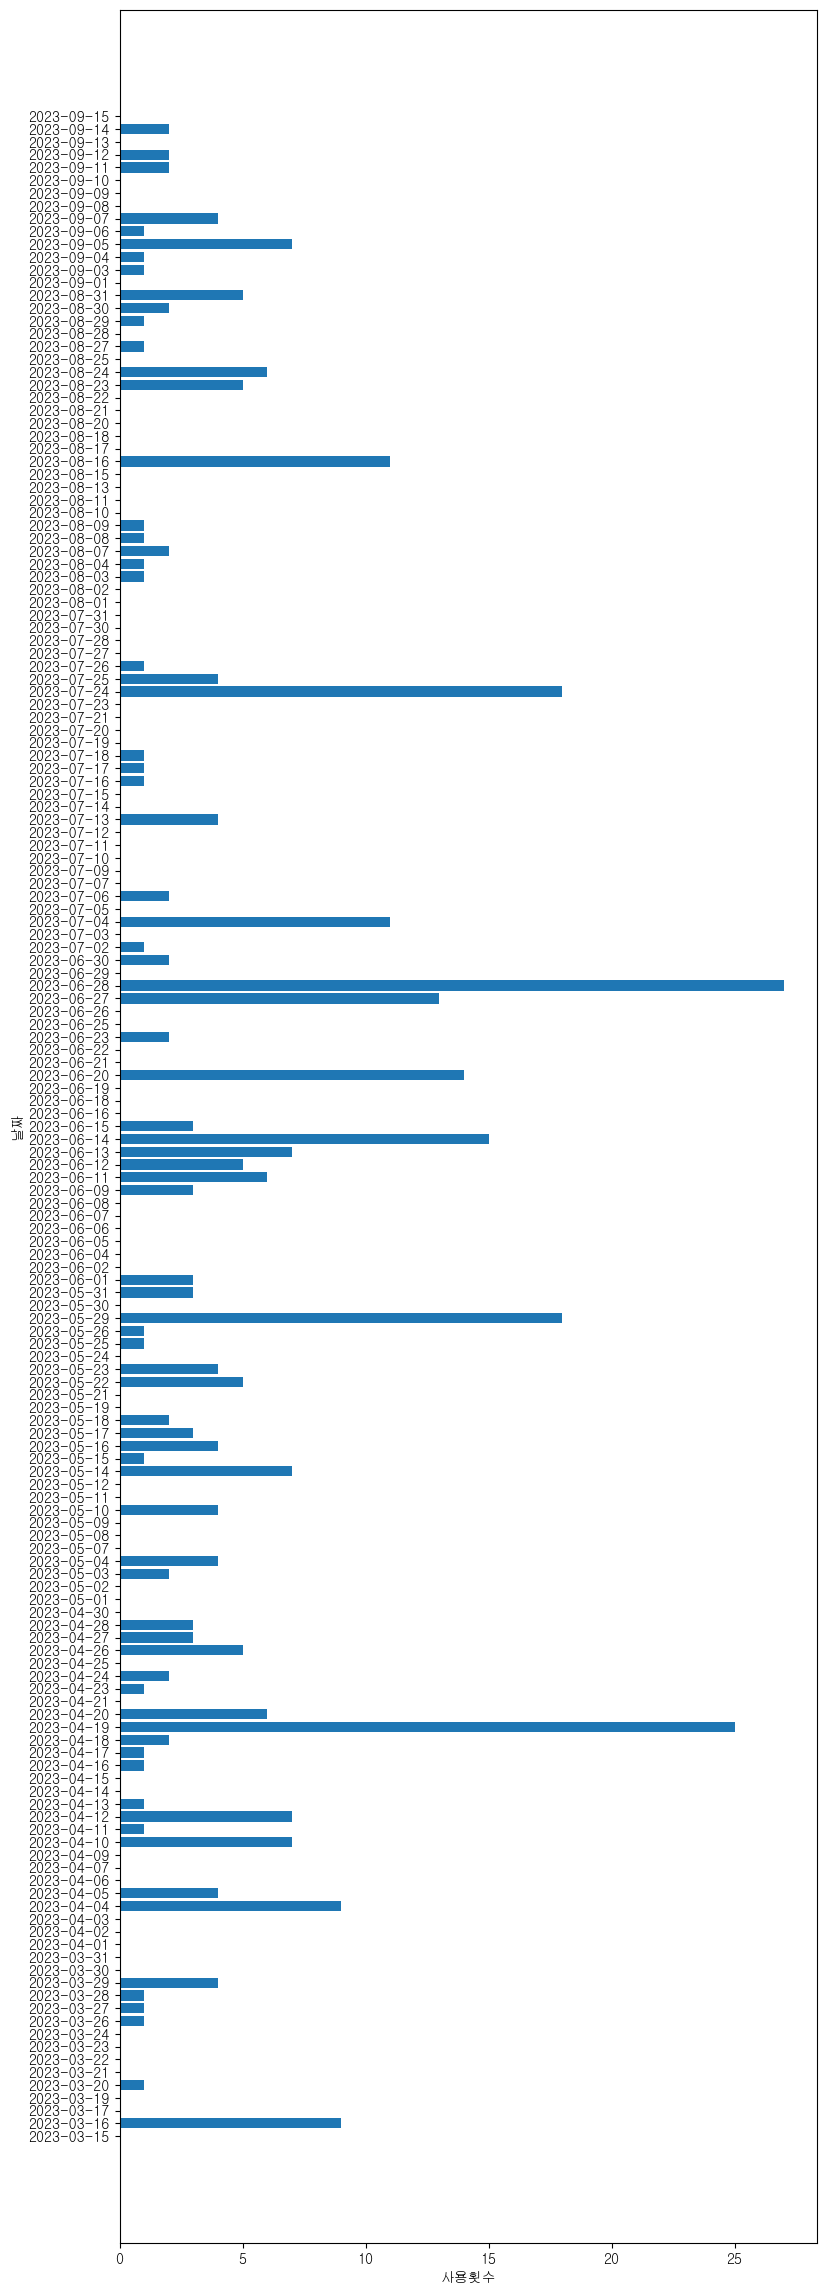

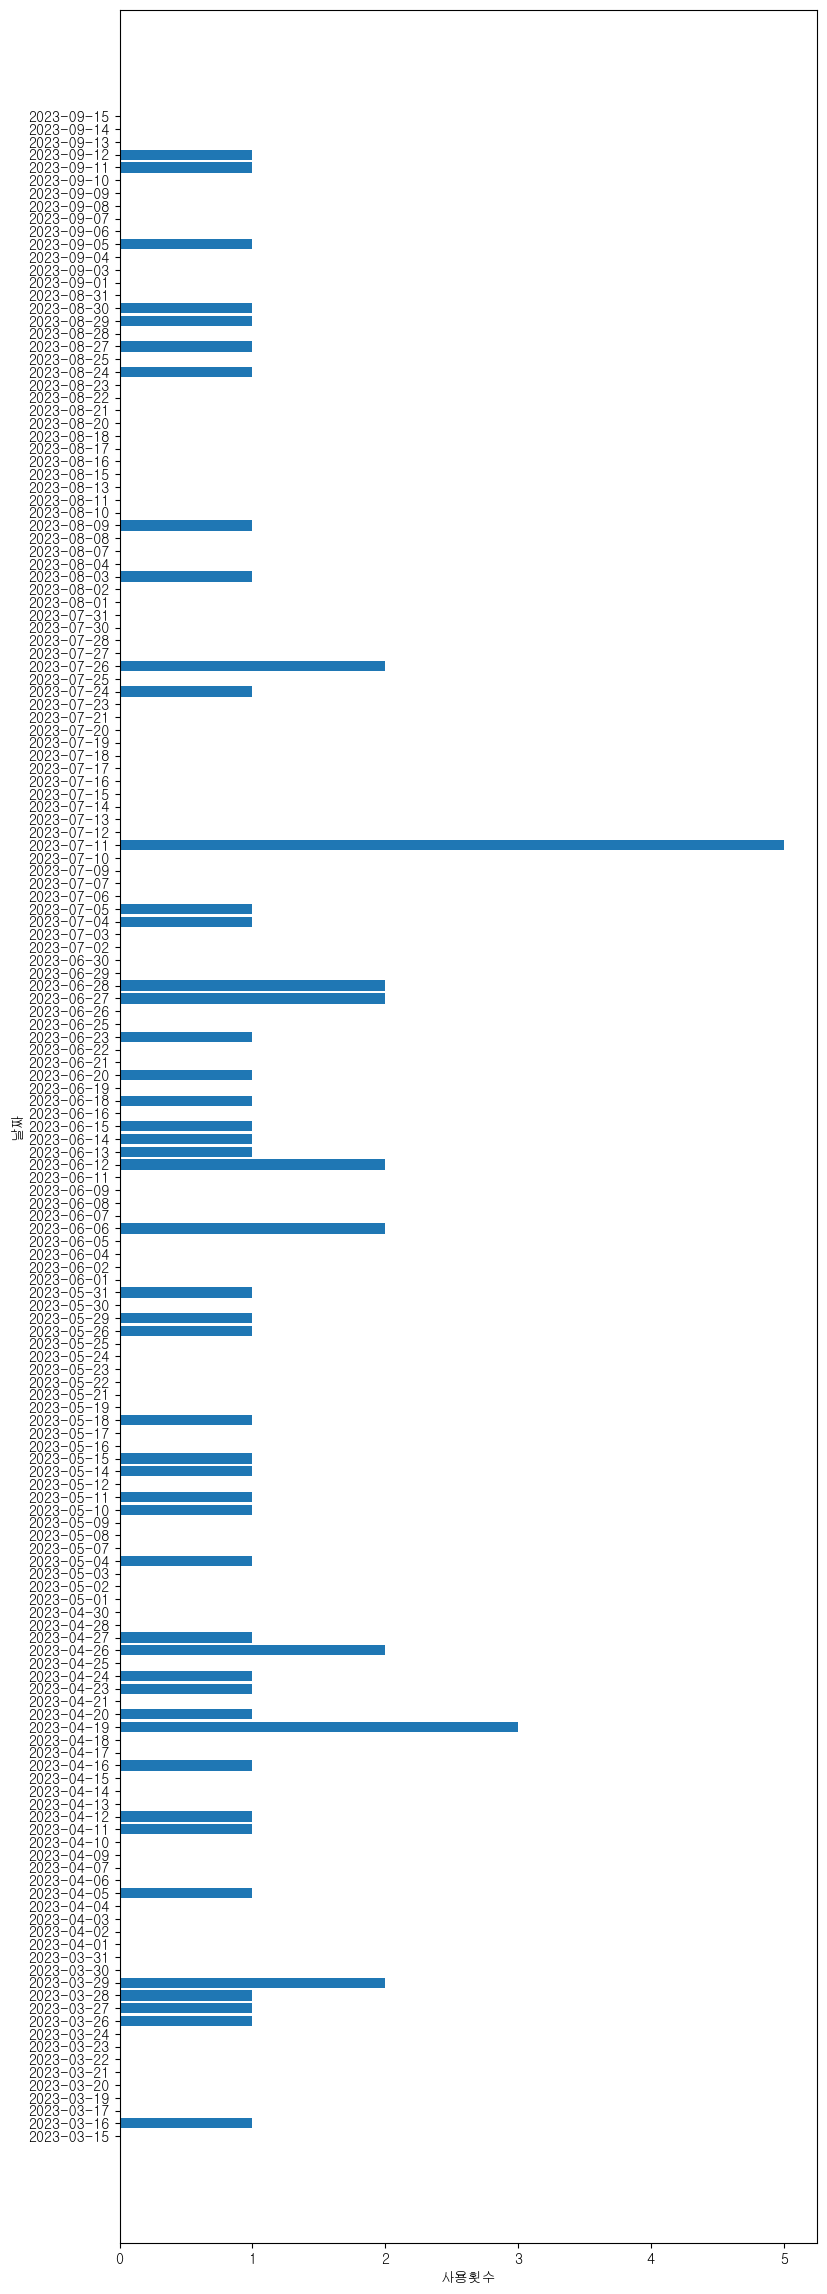

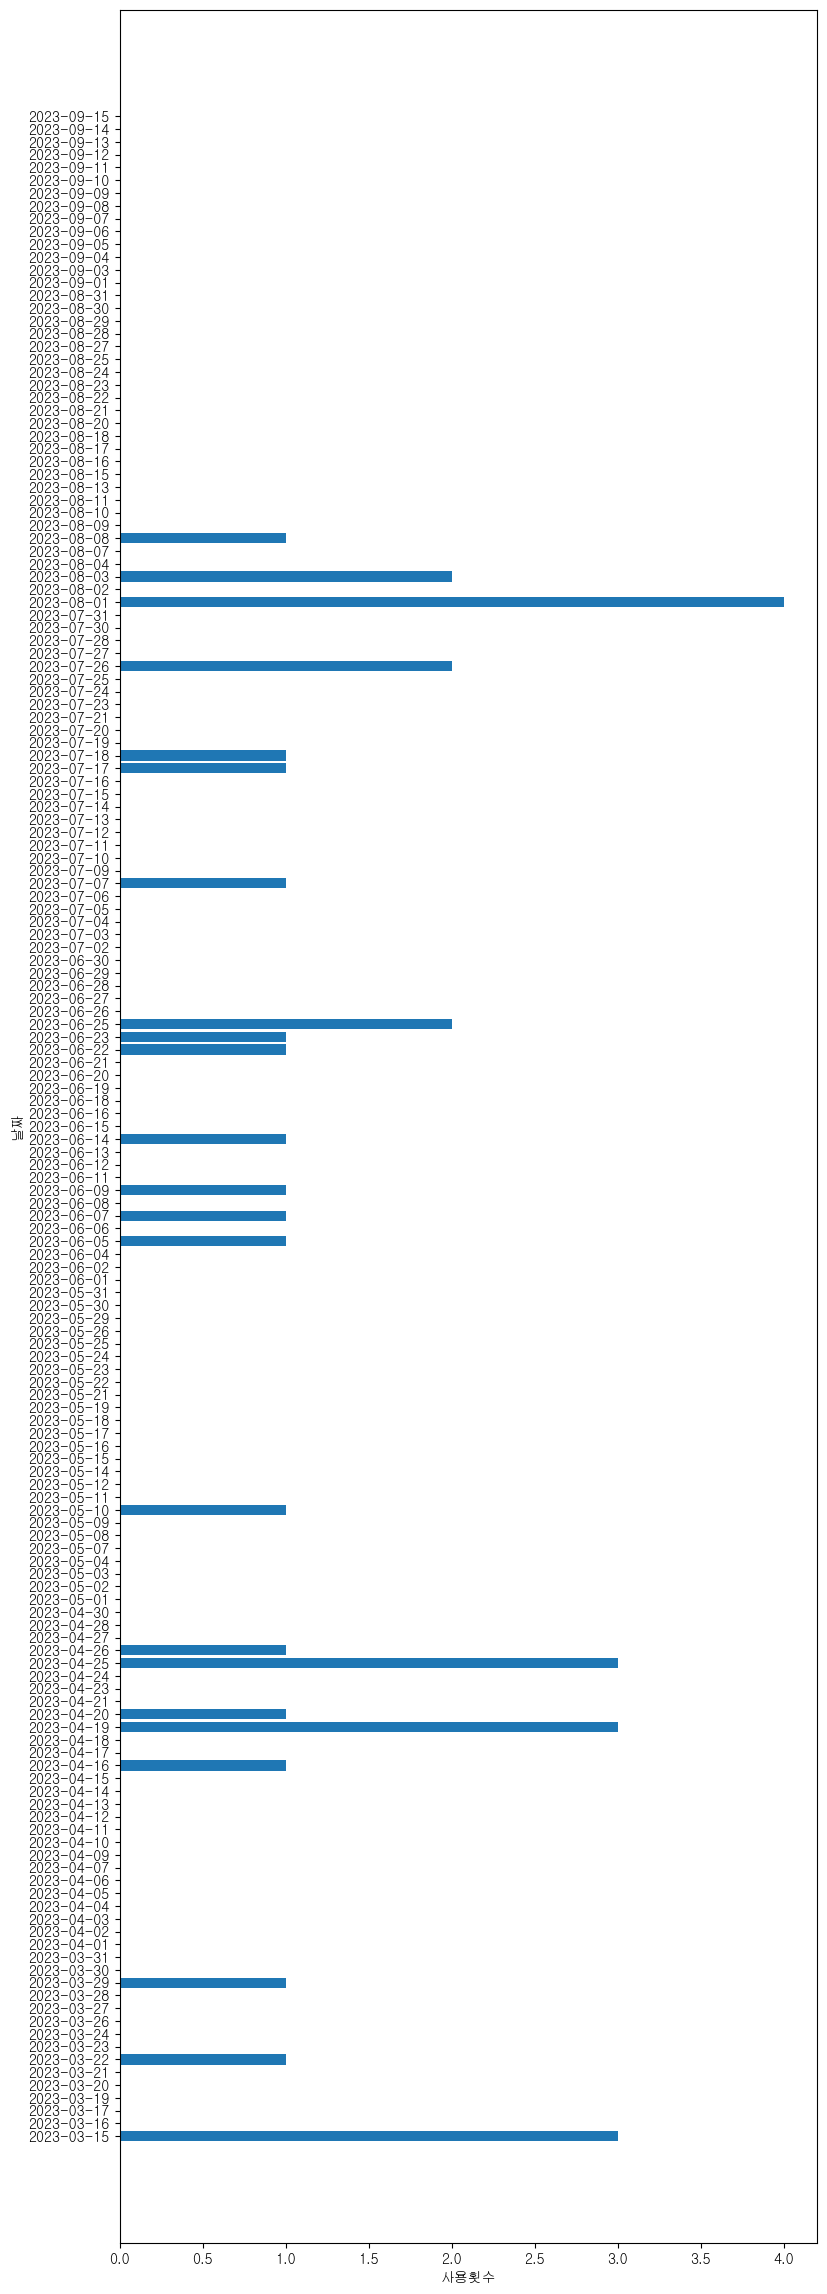

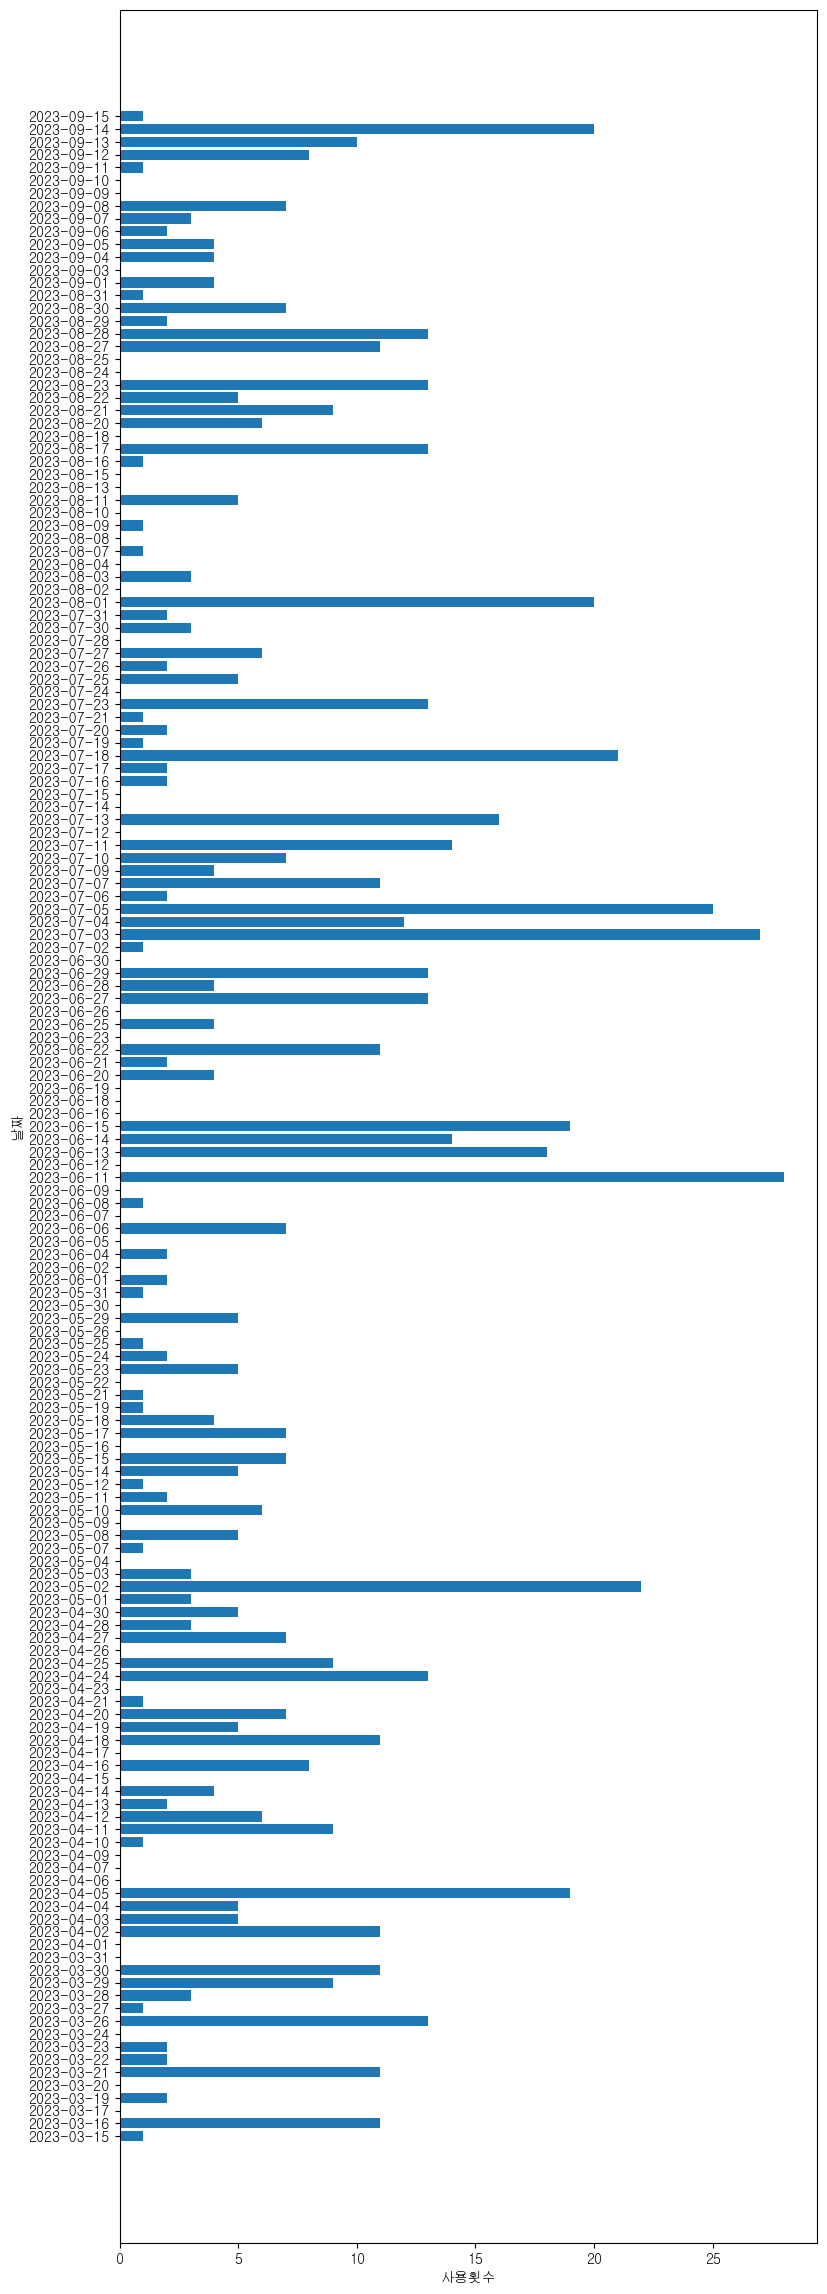

In [557]:
for x in ['전기_빈도_수','에너지_빈도_수','원자력_빈도_수',\
             '수력_빈도_수','화력_빈도_수','재생_빈도_수']:
    plt.figure(figsize=(9,29))
    plt.barh(df.groupby(['Date'])[x].sum().index, df.groupby(['Date'])[x].sum())
    plt.ylabel("날짜")
    plt.xlabel("사용횟수")
    plt.show()

In [343]:
df.groupby(['Date'])[x].sum().index

Index(['2023-03-15', '2023-03-16', '2023-03-17', '2023-03-19', '2023-03-20',
       '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-26',
       ...
       '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09', '2023-09-10',
       '2023-09-11', '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15'],
      dtype='object', name='Date', length=159)

C:\Users\user\AppData\Local\Temp\ipykernel_2344\2338304632.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


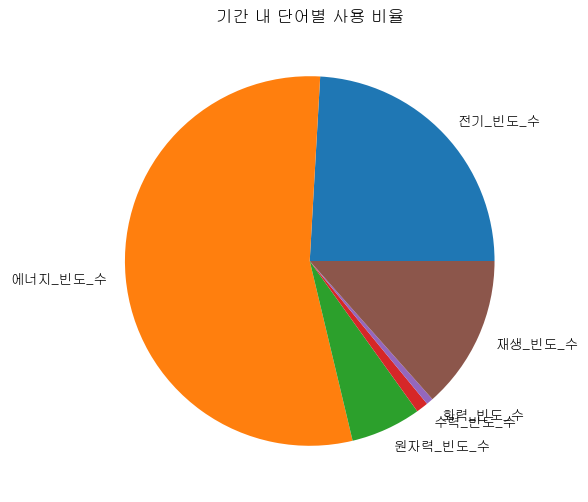

In [376]:
labels=df.iloc[:,4:].columns
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df.iloc[:,4:].sum(),labels=labels)
ax.set_title('기간 내 단어별 사용 비율')
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2344\3116553494.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


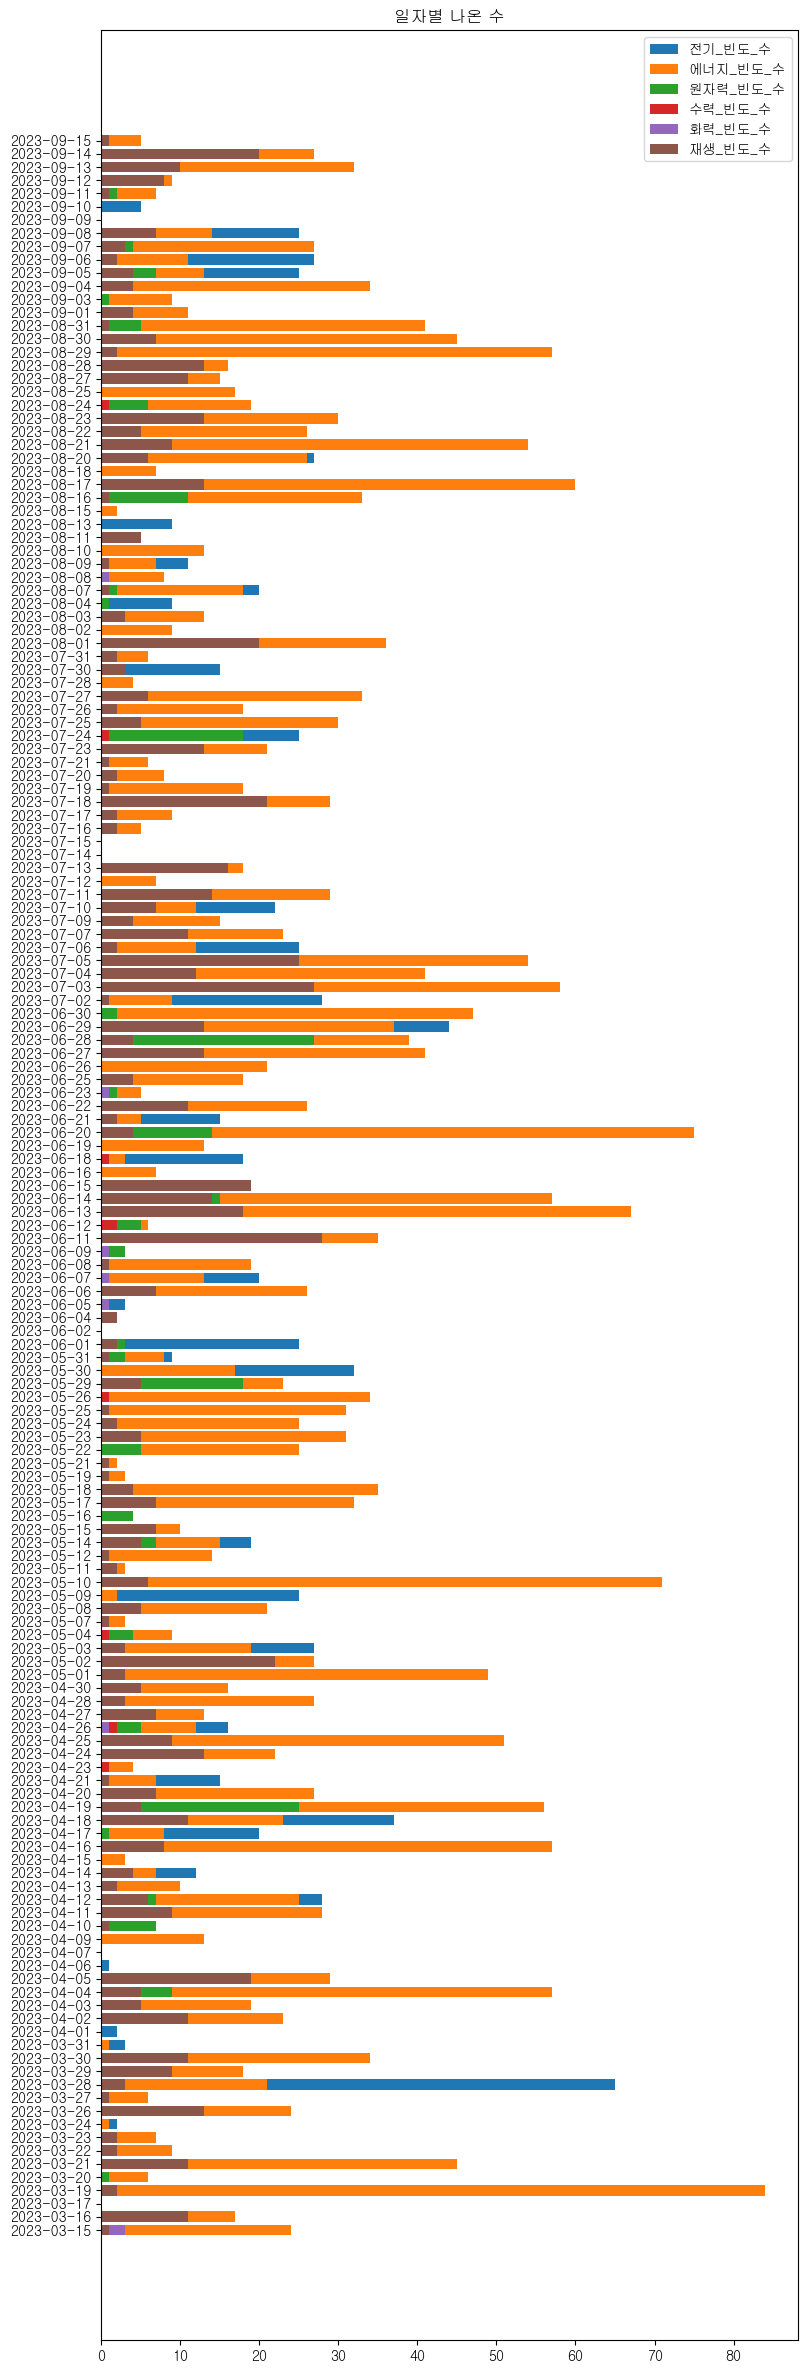

In [384]:
fig, ax = plt.subplots(figsize=(9,30))
for x in ['전기_빈도_수','에너지_빈도_수','원자력_빈도_수',\
             '수력_빈도_수','화력_빈도_수','재생_빈도_수']:
    ax.barh(df.groupby(['Date'])[x].sum().index, df.groupby(['Date'])[x].sum(),label=x)
ax.set_title("일자별 나온 수")
ax.legend()
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2344\2708799198.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


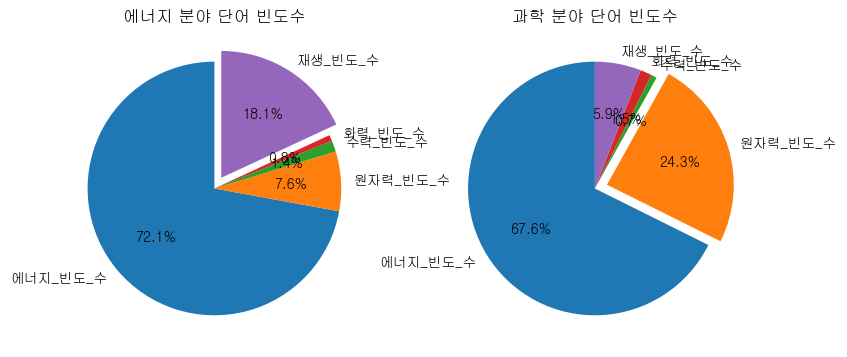

In [540]:
fig, ax = plt.subplots(1,2,figsize=(9,8))
ax[0].pie(df.groupby(['Filed']).sum().iloc[0,4:].values,labels=df.groupby(['Filed']).sum().iloc[0,4:].index,\
         startangle=90,autopct='%.1f%%',explode=[0,0,0,0,0.1])
ax[1].pie(df.groupby(['Filed']).sum().iloc[1,4:].values,labels=df.groupby(['Filed']).sum().iloc[1,4:].index,\
         startangle=90,autopct='%.1f%%',explode=[0,0.1,0,0,0])
ax[0].set_title('에너지 분야 단어 빈도수')
ax[1].set_title('과학 분야 단어 빈도수')
fig.show()

In [519]:
df.groupby(['Filed']).sum().iloc[0,4:]

에너지_빈도_수    3057
원자력_빈도_수     322
수력_빈도_수       60
화력_빈도_수       33
재생_빈도_수      767
Name: Energy, dtype: object